In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("binary_classification_dataset.csv")

In [3]:
df.head()

,feature1,feature2,label
0,-1.173104,0.258830,0
1,0.844000,0.936451,1
2,0.590231,-0.448608,0
3,1.222412,1.387470,1
4,-0.509876,0.280590,0


In [7]:
x= df.iloc[:,:-1]
y = df['label']

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Case1 - Weights initialized with 0

## Activation function of hidden layers --> relu

In [25]:
model = Sequential()
model.add(Dense(2 , activation = 'relu',input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))
model.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# default weights set by keras 
model.get_weights()

[array([[-0.7683129 ,  0.28405333],
        [ 0.6415417 , -1.0808086 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.62719464],
        [ 0.06736612]], dtype=float32),
 array([0.], dtype=float32)]

### Setting weights to 0

In [11]:
initial_weights = model.get_weights()

In [27]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [30]:
model.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [32]:
history = model.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.

In [33]:
# model weights after training
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.02432275], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 996us/step


<Axes: >

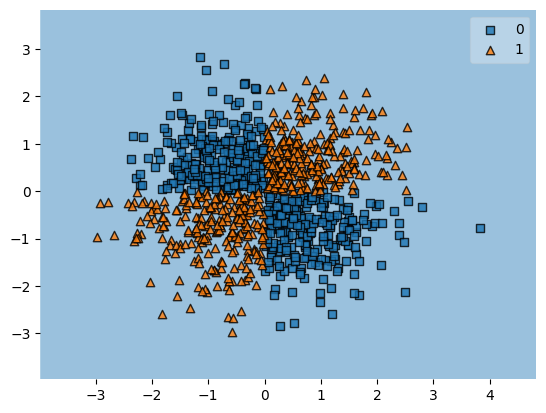

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [43]:
loss, accuracy = model.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 0.6931
loss:  0.6930751204490662
accuracy:  0.5059999823570251


## Activation function of hidden layers --> tanh

In [44]:
model2 = Sequential()
model2.add(Dense(2 , activation = 'tanh',input_dim = 2))
model2.add(Dense(1 , activation = 'sigmoid'))
model2.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Setting weights to 0

In [57]:
model2.set_weights(initial_weights)
model2.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [58]:
model2.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model2.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4888 - loss: 0.6932 - val_accuracy: 0.4950 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4963 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 796us/step


<Axes: >

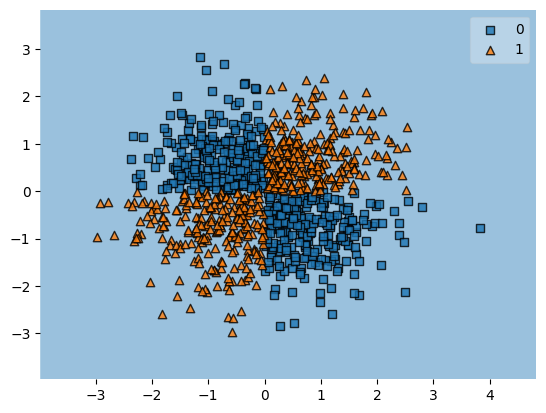

In [59]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model2)

In [60]:
loss, accuracy = model2.evaluate(x, y)
print("loss: " , loss )
print("accuracy: " , accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.6931
loss:  0.6930752396583557
accuracy:  0.5059999823570251


## Activation function of hidden layers --> sigmoid

In [50]:
model3 = Sequential()
model3.add(Dense(2 , activation = 'sigmoid',input_dim = 2))
model3.add(Dense(1 , activation = 'sigmoid'))
model3.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Setting weights to 0

In [61]:
model3.set_weights(initial_weights)
model3.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [62]:
model3.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model3.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4812 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4688 - loss: 0.6933 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - 

In [63]:
# model weights after training
model3.get_weights()

[array([[ 0.40917733,  0.40917733],
        [-0.53405535, -0.53405535]], dtype=float32),
 array([-0.37653738, -0.37653738], dtype=float32),
 array([[-0.05566455],
        [-0.05566455]], dtype=float32),
 array([0.01313542], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 743us/step


<Axes: >

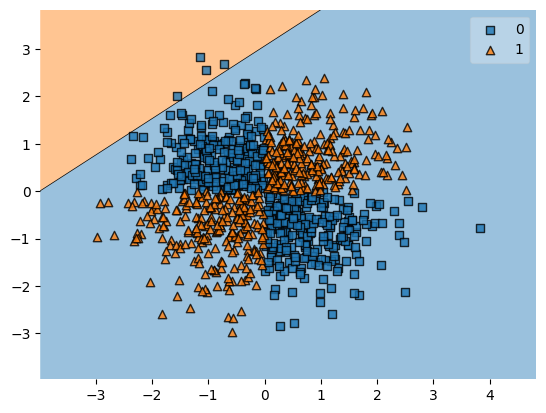

In [67]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model3)

In [66]:
loss3, accuracy3 = model3.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5020 - loss: 0.6927
loss:  0.6927016377449036
accuracy:  0.5019999742507935


# Case2 - Weights initialized with a constant value

## Activation Function of hidden layers --> relu

In [68]:
model4 = Sequential()
model4.add(Dense(2 , activation = 'relu',input_dim = 2))
model4.add(Dense(1 , activation = 'sigmoid'))
model4.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Setting weights to 0.5 (constant value)

In [72]:
initial_weights = model4.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape) * 0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape) * 0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape) * 0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape) * 0.5

In [74]:
model4.get_weights()

[array([[ 0.5206001 ,  0.559916  ],
        [ 0.39635408, -0.7374775 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.4535334 ],
        [0.29134262]], dtype=float32),
 array([0.], dtype=float32)]

In [75]:
model4.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model4.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5500 - loss: 0.7003 - val_accuracy: 0.5700 - val_loss: 0.6970
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5375 - loss: 0.6943 - val_accuracy: 0.5700 - val_loss: 0.6921
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5275 - loss: 0.6891 - val_accuracy: 0.5600 - val_loss: 0.6873
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5238 - loss: 0.6842 - val_accuracy: 0.5500 - val_loss: 0.6831
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5163 - loss: 0.6799 - val_accuracy: 0.5600 - val_loss: 0.6791
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5163 - loss: 0.6757 - val_accuracy: 0.5800 - val_loss: 0.6755
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5213 - loss: 0.6720 - val_accuracy: 0.5950 - val_loss: 0.6722
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 0.6684 - val_accuracy: 0.6150 - 

In [76]:
# model weights after training
model4.get_weights()

[array([[ 1.5793797 ,  1.9487914 ],
        [ 0.84916866, -0.90654844]], dtype=float32),
 array([-0.38345706, -0.39209455], dtype=float32),
 array([[ 1.7503548],
        [-1.2792255]], dtype=float32),
 array([-0.05348996], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 760us/step


<Axes: >

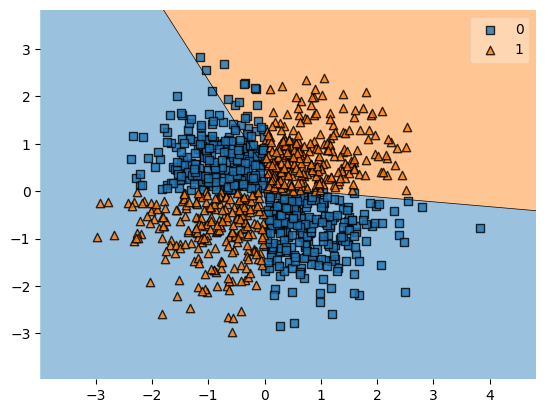

In [77]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model4)

In [78]:
loss3, accuracy3 = model4.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5021
loss:  0.5021055936813354
accuracy:  0.7089999914169312


## Activation Function of hidden layers --> tanh

In [79]:
model5 = Sequential()
model5.add(Dense(2 , activation = 'tanh',input_dim = 2))
model5.add(Dense(1 , activation = 'sigmoid'))
model5.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Setting weights to 0.5 (constant value)

In [80]:
initial_weights = model5.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape) * 0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape) * 0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape) * 0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape) * 0.5

In [81]:
model5.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model5.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5250 - loss: 0.7262 - val_accuracy: 0.5550 - val_loss: 0.7075
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5188 - loss: 0.7208 - val_accuracy: 0.5450 - val_loss: 0.7037
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5125 - loss: 0.7158 - val_accuracy: 0.5450 - val_loss: 0.7002
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.7115 - val_accuracy: 0.5450 - val_loss: 0.6968
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4925 - loss: 0.7073 - val_accuracy: 0.5400 - val_loss: 0.6937
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4963 - loss: 0.7032 - val_accuracy: 0.5250 - val_loss: 0.6911
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4875 - loss: 0.6997 - val_accuracy: 0.5250 - val_loss: 0.6884
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4850 - loss: 0.6965 - val_accuracy: 0.5150 - 

In [82]:
# model weights after training
model5.get_weights()

[array([[ 1.3261373 , -0.90797085],
        [-1.4382067 ,  0.9930204 ]], dtype=float32),
 array([1.0764256, 0.7205873], dtype=float32),
 array([[1.4758636],
        [1.5864202]], dtype=float32),
 array([-0.9669157], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

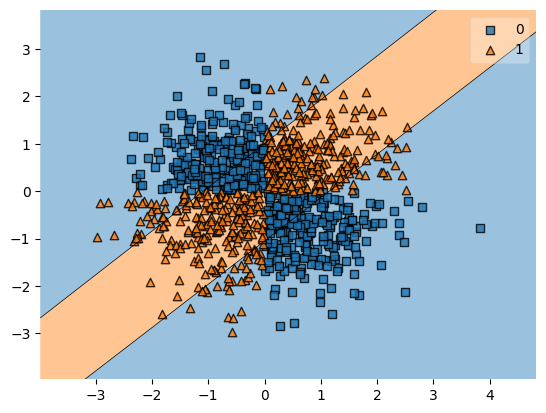

In [83]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model5)

In [84]:
loss3, accuracy3 = model5.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5477
loss:  0.5476855635643005
accuracy:  0.7360000014305115


## Activation Function of hidden layers --> sigmoid

In [86]:
model6 = Sequential()
model6.add(Dense(2 , activation = 'tanh',input_dim = 2))
model6.add(Dense(1 , activation = 'sigmoid'))
model6.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [87]:
initial_weights = model6.get_weights()
initial_weights[0] = np.ones(model.get_weights()[0].shape) * 0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape) * 0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape) * 0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape) * 0.5

In [88]:
model6.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model6.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5088 - loss: 0.7417 - val_accuracy: 0.5000 - val_loss: 0.7440
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5125 - loss: 0.7318 - val_accuracy: 0.5100 - val_loss: 0.7344
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5200 - loss: 0.7235 - val_accuracy: 0.5200 - val_loss: 0.7254
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5263 - loss: 0.7158 - val_accuracy: 0.5200 - val_loss: 0.7183
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5288 - loss: 0.7095 - val_accuracy: 0.5350 - val_loss: 0.7113
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 0.7039 - val_accuracy: 0.5500 - val_loss: 0.7056
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5375 - loss: 0.6988 - val_accuracy: 0.5600 - val_loss: 0.7011
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5475 - loss: 0.6948 - val_accuracy: 0.5650 - 

In [89]:
# model weights after training
model6.get_weights()

[array([[-0.5768164, -1.2057983],
        [ 0.6282263,  1.2963959]], dtype=float32),
 array([-0.24171074,  1.1413897 ], dtype=float32),
 array([[-1.8756063],
        [ 1.7865355]], dtype=float32),
 array([-0.9287855], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 969us/step


<Axes: >

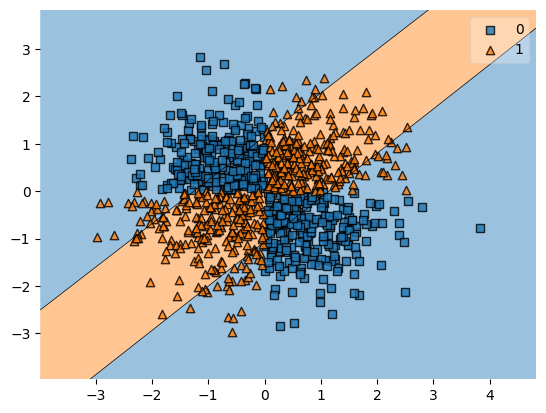

In [90]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model6)

In [91]:
loss3, accuracy3 = model6.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7390 - loss: 0.5633
loss:  0.5632565021514893
accuracy:  0.7390000224113464


# Case3 - Initialized with very random values (very small /very big)

## Activation function of hidden layers --> tanh

In [92]:
model7 = Sequential()
model7.add(Dense(2 , activation = 'tanh',input_dim = 2))
model7.add(Dense(2 , activation = 'tanh'))
model7.add(Dense(2 , activation = 'tanh'))
model7.add(Dense(2 , activation = 'tanh'))
model7.add(Dense(1 , activation = 'sigmoid'))
model6.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

### initializing weights with very small random values

In [96]:
initial_weights = model7.get_weights()
initial_weights[0] = np.random.randn(model7.get_weights()[0].shape[0],model7.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model7.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model7.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model7.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model7.get_weights()[4].shape[0],model7.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model7.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model7.get_weights()[6].shape[0],model7.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model7.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model7.get_weights()[8].shape[0],model7.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model7.get_weights()[9].shape)

In [98]:
model7.set_weights(initial_weights )

In [102]:
model7.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model7.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4913 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4888 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - 

In [103]:
model7.get_weights()

[array([[ 0.00436916,  0.00176888],
        [ 0.00111232, -0.00018473]], dtype=float32),
 array([1.3180122e-05, 1.2551532e-05], dtype=float32),
 array([[-0.00048872, -0.01319501],
        [ 0.00643992, -0.01309482]], dtype=float32),
 array([-9.456748e-05, -5.408227e-04], dtype=float32),
 array([[0.00029646, 0.01269225],
        [0.01779747, 0.00695495]], dtype=float32),
 array([0.00028633, 0.00074527], dtype=float32),
 array([[-0.00086291,  0.00116049],
        [-0.0003129 ,  0.00088217]], dtype=float32),
 array([-2.4496969e-06, -1.2027402e-03], dtype=float32),
 array([[4.1553685e-06],
        [1.1844322e-03]], dtype=float32),
 array([-0.02377206], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

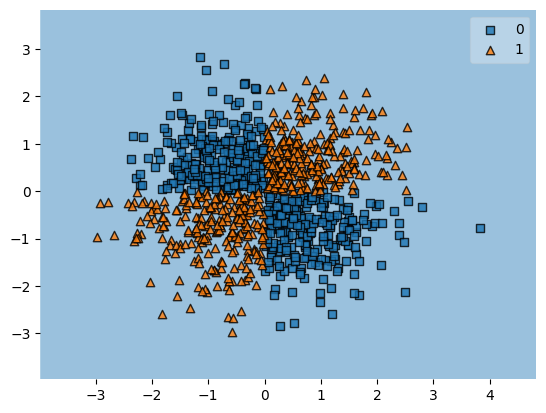

In [104]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model7)

In [105]:
loss3, accuracy3 = model7.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.6931
loss:  0.6930751800537109
accuracy:  0.5059999823570251


### initializing weights with very large random values

In [124]:
initial_weights = model7.get_weights()
initial_weights[0] = np.random.randn(model7.get_weights()[0].shape[0],model7.get_weights()[0].shape[1])
initial_weights[1] = np.zeros(model7.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model7.get_weights()[2].shape[1]) 
initial_weights[3] = np.zeros(model7.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model7.get_weights()[4].shape[0],model7.get_weights()[4].shape[1]) 
initial_weights[5] = np.zeros(model7.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model7.get_weights()[6].shape[0],model7.get_weights()[6].shape[1]) 
initial_weights[7] = np.zeros(model7.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model7.get_weights()[8].shape[0],model7.get_weights()[8].shape[1]) 
initial_weights[9] = np.zeros(model7.get_weights()[9].shape)

In [125]:
model7.set_weights(initial_weights )

In [126]:
model7.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model7.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5325 - loss: 1.1010 - val_accuracy: 0.6200 - val_loss: 0.9293
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5500 - loss: 1.0314 - val_accuracy: 0.6350 - val_loss: 0.8785
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5775 - loss: 0.9685 - val_accuracy: 0.6450 - val_loss: 0.8364
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5888 - loss: 0.9139 - val_accuracy: 0.6450 - val_loss: 0.8015
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.8698 - val_accuracy: 0.6450 - val_loss: 0.7705
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6012 - loss: 0.8310 - val_accuracy: 0.6500 - val_loss: 0.7470
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6162 - loss: 0.8005 - val_accuracy: 0.6450 - val_loss: 0.7281
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6200 - loss: 0.7749 - val_accuracy: 0.6450 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

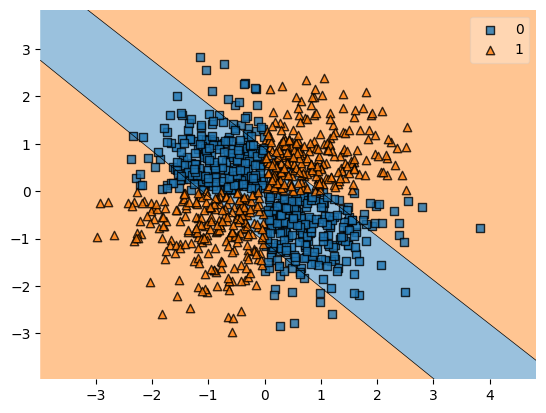

In [127]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model7)

In [128]:
loss3, accuracy3 = model7.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.4705
loss:  0.4704838693141937
accuracy:  0.7870000004768372


## Activation function of hidden layers --> sigmoid

In [106]:
model8 = Sequential()
model8.add(Dense(2 , activation = 'sigmoid',input_dim = 2))
model8.add(Dense(2 , activation = 'sigmoid'))
model8.add(Dense(2 , activation = 'sigmoid'))
model8.add(Dense(2 , activation = 'sigmoid'))
model8.add(Dense(1 , activation = 'sigmoid'))
model8.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

### initializing weights with very small random values

In [107]:
initial_weights = model8.get_weights()
initial_weights[0] = np.random.randn(model8.get_weights()[0].shape[0],model8.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model8.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model8.get_weights()[2].shape[0],model8.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model8.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model8.get_weights()[4].shape[0],model8.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model8.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model8.get_weights()[6].shape[0],model8.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model8.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model8.get_weights()[8].shape[0],model8.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model8.get_weights()[9].shape)

In [108]:
model8.set_weights(initial_weights )

In [109]:
model8.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model8.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 940us/step


<Axes: >

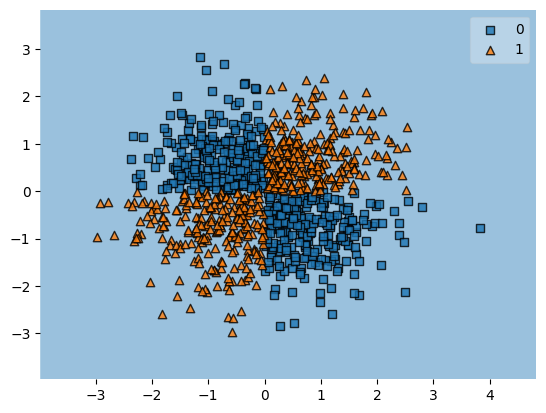

In [110]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model8)

In [111]:
loss3, accuracy3 = model8.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 0.6931
loss:  0.6930755376815796
accuracy:  0.5059999823570251


### initializing weights with very large random values

In [129]:
initial_weights = model8.get_weights()
initial_weights[0] = np.random.randn(model8.get_weights()[0].shape[0],model8.get_weights()[0].shape[1]) 
initial_weights[1] = np.zeros(model8.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model8.get_weights()[2].shape[0],model8.get_weights()[2].shape[1]) 
initial_weights[3] = np.zeros(model8.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model8.get_weights()[4].shape[0],model8.get_weights()[4].shape[1]) 
initial_weights[5] = np.zeros(model8.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model8.get_weights()[6].shape[0],model8.get_weights()[6].shape[1]) 
initial_weights[7] = np.zeros(model8.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model8.get_weights()[8].shape[0],model8.get_weights()[8].shape[1]) 
initial_weights[9] = np.zeros(model8.get_weights()[9].shape)

In [130]:
model8.set_weights(initial_weights )

In [131]:
model8.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model8.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5063 - loss: 0.7044 - val_accuracy: 0.5050 - val_loss: 0.7031
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.7020 - val_accuracy: 0.5050 - val_loss: 0.7007
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6998 - val_accuracy: 0.5050 - val_loss: 0.6992
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6982 - val_accuracy: 0.5050 - val_loss: 0.6978
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6971 - val_accuracy: 0.5050 - val_loss: 0.6967
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6961 - val_accuracy: 0.5050 - val_loss: 0.6960
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5063 - loss: 0.6954 - val_accuracy: 0.5050 - val_loss: 0.6953
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6948 - val_accuracy: 0.5050 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

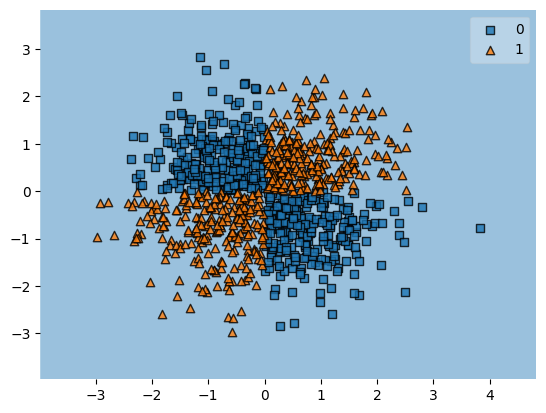

In [132]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model8)

In [133]:
loss3, accuracy3 = model8.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 0.6930
loss:  0.692962646484375
accuracy:  0.5059999823570251


## Activation function of hidden layers --> relu

In [112]:
model9 = Sequential()
model9.add(Dense(2 , activation = 'relu',input_dim = 2))
model9.add(Dense(2 , activation = 'relu'))
model9.add(Dense(2 , activation = 'relu'))
model9.add(Dense(2 , activation = 'relu'))
model9.add(Dense(1 , activation = 'sigmoid'))
model8.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83 (336.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56 (228.00 B)

### initializing weights with very small random values

In [113]:
initial_weights = model9.get_weights()
initial_weights[0] = np.random.randn(model9.get_weights()[0].shape[0],model9.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model9.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model9.get_weights()[2].shape[0],model9.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model9.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model9.get_weights()[4].shape[0],model9.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model9.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model9.get_weights()[6].shape[0],model9.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model9.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model9.get_weights()[8].shape[0],model9.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model9.get_weights()[9].shape)

In [114]:
model9.set_weights(initial_weights )

In [115]:
model9.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model9.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4787 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5050 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

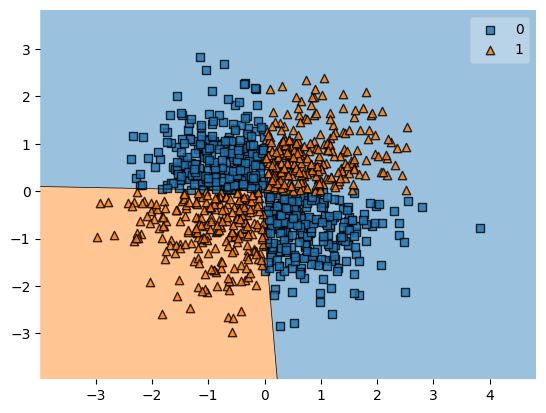

In [137]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model9)

In [139]:
loss3, accuracy3 = model9.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.4962
loss:  0.4962497055530548
accuracy:  0.746999979019165


### initializing weights with very large random values

In [134]:
initial_weights = model9.get_weights()
initial_weights[0] = np.random.randn(model9.get_weights()[0].shape[0],model9.get_weights()[0].shape[1]) 
initial_weights[1] = np.zeros(model9.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model9.get_weights()[2].shape[0],model9.get_weights()[2].shape[1]) 
initial_weights[3] = np.zeros(model9.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model9.get_weights()[4].shape[0],model9.get_weights()[4].shape[1]) 
initial_weights[5] = np.zeros(model9.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model9.get_weights()[6].shape[0],model9.get_weights()[6].shape[1]) 
initial_weights[7] = np.zeros(model9.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model9.get_weights()[8].shape[0],model9.get_weights()[8].shape[1]) 
initial_weights[9] = np.zeros(model9.get_weights()[9].shape)

In [135]:
model9.set_weights(initial_weights )


In [136]:
model9.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model9.fit(x,y,epochs = 100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4938 - loss: 0.6925 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5375 - loss: 0.6919 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 0.6913 - val_accuracy: 0.5550 - val_loss: 0.6910
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5562 - loss: 0.6903 - val_accuracy: 0.5750 - val_loss: 0.6901
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5763 - loss: 0.6888 - val_accuracy: 0.5800 - val_loss: 0.6889
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5750 - loss: 0.6871 - val_accuracy: 0.5750 - val_loss: 0.6867
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5962 - loss: 0.6839 - val_accuracy: 0.5800 - val_loss: 0.6843
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5950 - loss: 0.6800 - val_accuracy: 0.5800 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

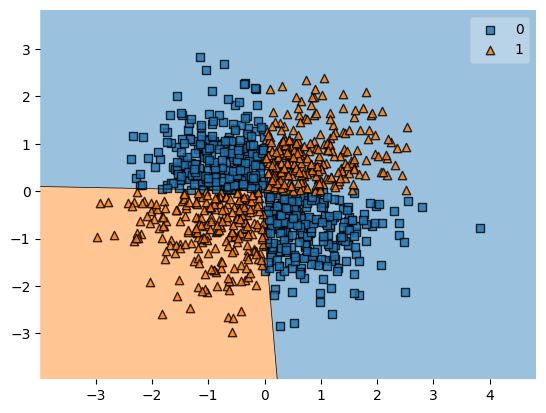

In [138]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values.astype(int),clf=model9)

In [140]:
loss3, accuracy3 = model9.evaluate(x, y)
print("loss: " , loss3 )
print("accuracy: " , accuracy3 )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7470 - loss: 0.4962
loss:  0.4962497055530548
accuracy:  0.746999979019165


# Summary

### Case-1 (initialized with 0)

##### tanh/relu ---> weights always remain 0
##### sigmoid ---> behaves like a linear model

### Case-2 (initialized with constant value)
##### sigmoid/tanh/relu ---> behaves like a linear model

### Case-3 (initialized with small random value)
##### sigmoid/tanh/relu ---> vanishing gradient prolem (tanh>sigmoid>relu)

In [ ]:
### Case-4 (initialized with large random value)
##### sigmoid/tanh ---> satutration -- slow convergence and vanishing gradient problem
##### tanh/relu ---> weights always remain 0